### 1. Basic Statistics 

In [ ]:
import random
import pandas as pd

# sample from some kind hidden structure

def sample_from_hidden_structures(samples=100, structure='coin'):    
    if structure == 'coin':
        # Coin has two outcomes: 'Heads' or 'Tails'
        outcomes = ['Heads', 'Tails']
        data = [random.choice(outcomes) for _ in range(samples)]

    elif structure == 'dice':
        # Dice has six outcomes: 1, 2, 3, 4, 5, 6
        outcomes = [1, 2, 3, 4, 5, 6]
        data = [random.choice(outcomes) for _ in range(samples)]

    return pd.DataFrame(data, columns=['Outcome'])


df_samples = sample_from_hidden_structures(samples=100000, structure='dice')
print(df_samples)

In [ ]:
import matplotlib.pyplot as plt

def plot_distribution(df, structure='coin'):

    if structure == 'coin':
        # For coin flips, use a bar plot to show the frequency of each outcome
        counts = df['Outcome'].value_counts()
        counts.plot(kind='bar', color=['blue', 'green'])
        plt.title('Coin Flip Distribution')
        plt.xlabel('Outcome')
        plt.ylabel('Frequency')
        plt.xticks(rotation=0)

    elif structure == 'dice':
        # For dice rolls, use a histogram to show the distribution of outcomes
        df['Outcome'].plot(kind='hist', bins=range(1, 8), align='left', rwidth=0.5)
        plt.title('Dice Roll Distribution')
        plt.xlabel('Outcome')
        plt.ylabel('Frequency')
        plt.xticks(range(1, 7))

    plt.show()


plot_distribution(df_samples, 'dice')

### some insights
- statistical observations <- hidden structure + randomness (observations are samples)
- distribution is a good way to describe random varibles
- sometimes we know the structure, most of time we only have the samples (stock market). samples -> (infer) structure -> then (make predictions) -> new obsavtions 
- random sampling (how to lie with facts. narratives)

### 2. Normal Distribution


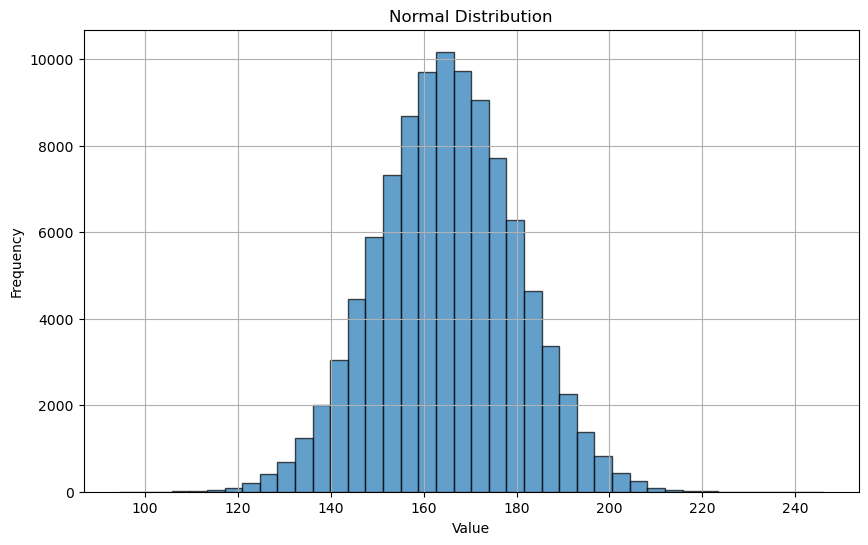

In [14]:
import random
import pandas as pd

# heights of population
def sample_normal_distribution(samples=100000, mu=170, sigma=10):
    data = [random.gauss(mu, sigma) for _ in range(samples)]
    return pd.DataFrame(data, columns=['Value'])

df_normal = sample_normal_distribution(samples=100000, mu=165, sigma=15)

import matplotlib.pyplot as plt

def plot_distribution(df, title='Data Distribution', bins=30):

    plt.figure(figsize=(10, 6))
    plt.hist(df['Value'], bins=bins, edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plot_distribution(df_normal, title='Normal Distribution', bins=40)

### some insights
- mean, std to describe a bell curlve
- std x 1 = 68%, std x 2 = 95%. if aaple stock, mean annual return 8%, std 8%, what's probablity if buy apple, I will lose money this year. 
- risk vs std (narrow? wide? more risky)
- normal distribution is a dangeous assumption. black swan
- stable structure vs unstable vs non-stationary 
- balance return and risk - sharp ratio. risk/reward trade off

### 3. std, sharp ratio - finding the best risk/reward (trade off) stock
- activity 15

### sharp ratio
- activity 16

### 4. groupby object (the structure inside of a df, one to many)
- activity 5

### 5 multi-index